# Assignment 1: Plot Central Limit Theorem
# Extra Credit Work is in the bottom

In [11]:
from __future__ import print_function 
author = 'xj655'
import numpy as np
import pylab as plt
import pandas as pd
import seaborn
from scipy.optimize import curve_fit, minimize

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [12]:
distributions = ['chisq']

In [13]:
mymean = 100
mymean

100

In [14]:
mysize = np.array(range(11, 2000,20))
mysize,mysize.shape

(array([  11,   31,   51,   71,   91,  111,  131,  151,  171,  191,  211,
         231,  251,  271,  291,  311,  331,  351,  371,  391,  411,  431,
         451,  471,  491,  511,  531,  551,  571,  591,  611,  631,  651,
         671,  691,  711,  731,  751,  771,  791,  811,  831,  851,  871,
         891,  911,  931,  951,  971,  991, 1011, 1031, 1051, 1071, 1091,
        1111, 1131, 1151, 1171, 1191, 1211, 1231, 1251, 1271, 1291, 1311,
        1331, 1351, 1371, 1391, 1411, 1431, 1451, 1471, 1491, 1511, 1531,
        1551, 1571, 1591, 1611, 1631, 1651, 1671, 1691, 1711, 1731, 1751,
        1771, 1791, 1811, 1831, 1851, 1871, 1891, 1911, 1931, 1951, 1971,
        1991]), (100,))

# 1. chi-square

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'N')

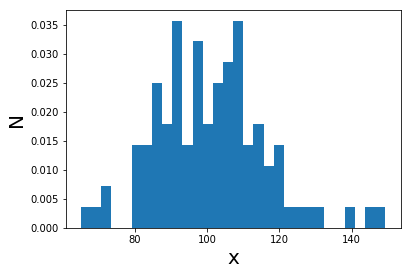

In [17]:
import numpy as np
df =  mymean
md = {}
np.random.seed(22)
md['chisq'] = np.random.chisquare(df, size=100)
#df is degree of freedom, and it is accidentlly equal to mean in chisquare
#np.random.chisquare?
plt.hist(md['chisq'], bins = 30,normed=True)
plt.xlabel("x",fontsize=20)
plt.ylabel("N",fontsize=20)


Figure 1: Chi sq distribution: df = 100, N=100

In [115]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 101.00, standard deviation: 15.11


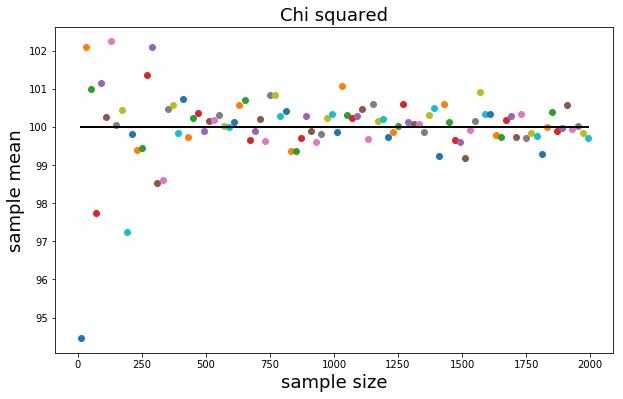

In [140]:
md['chisq'] = {} 
np.random.seed(5)
for i in range(100):
    md['chisq'][i] = np.random.chisquare(df, mysize[i])

md['chisq']['means'] = {}
axchisq_mu_n = plt.figure(figsize(10,6)).add_subplot(111)

for i in range(100):
    if not type(md['chisq'][i]) == str:
        md['chisq']['means'][i] = md['chisq'][i].mean()
        #and plot it
        axchisq_mu_n.plot(mysize[i], md['chisq']['means'][i], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [100, 100], 'k')

Figure2: When the sample size increases,n the mean of the sample becomes more closer to the mean of distribution. 

# 2. Poisson Distritution

Text(0,0.5,'N')

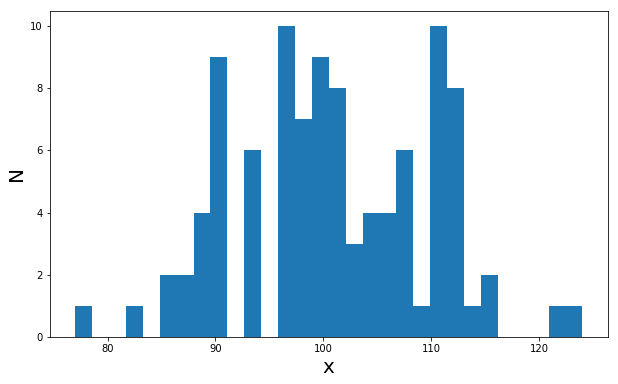

In [10]:
import numpy as np
lamda = mymean
np.random.seed(22)
md['poisson'] = np.random.poisson(lamda, size=100)
plt.hist(md['poisson'], bins = 30)
plt.xlabel("x",fontsize=20)
plt.ylabel("N",fontsize=20)

Figure 3: Poisson distribution: lamda = 100, N=100

In [11]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['poisson'].mean(), md['poisson'].std()))

Poisson mean: 100.95, standard deviation: 8.96


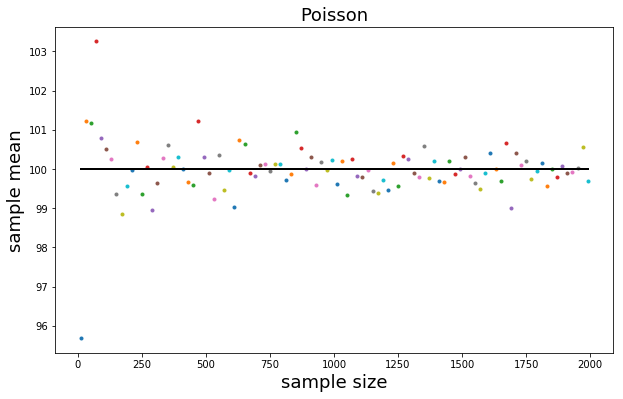

In [141]:
md['poisson'] = {} 
np.random.seed(4)
for i in range(100):
    md['poisson'][i] = np.random.chisquare(lamda, mysize[i])

md['poisson']['means'] = {}
axpoi_mu_n = plt.figure(figsize(10,6)).add_subplot(111)

for i in range(100):
    if not type(md['poisson'][i]) == str:
        md['poisson']['means'][i] = md['poisson'][i].mean()
        #and plot it
        axpoi_mu_n.plot(mysize[i],md['poisson']['means'][i], '.')
        axpoi_mu_n.set_xlabel('sample size', fontsize=18)
        axpoi_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoi_mu_n.set_title('Poisson', fontsize=18)
        axpoi_mu_n.plot([min(mysize), max(mysize)], [lamda, lamda], 'k')
        #draw a line between x1,y1 to x2,y2

Figure4: When the sample size increases,n the mean of the sample becomes more closer to the mean of distribution. 

# 3. Normal Distribution

In [122]:
mean = mymean
zigma = 1

Text(0,0.5,'N')

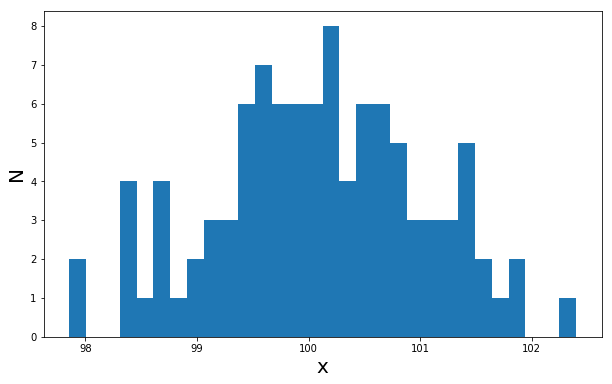

In [123]:
md['normal'] = np.random.randn(100) + 100
plt.hist(md['normal'], bins = 30)
plt.xlabel("x",fontsize=20)
plt.ylabel("N",fontsize=20)

Figure 5: Normal distribution: mean=100, zigma=1, N=100

In [124]:
print( 'the mean of normal distribution is %0.2f, the standard deviation: %.2f'%(md['normal'].mean(),md['normal'].std()))

the mean of normal distribution is 100.09, the standard deviation: 0.94


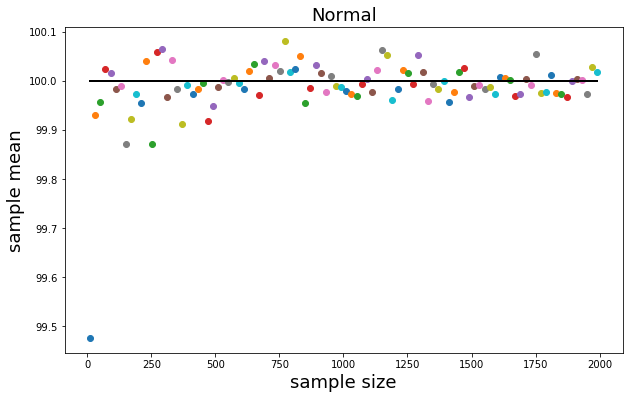

In [125]:
md['normal'] = {}
np.random.seed(2)
for i in range(100):
    md['normal'][i] = np.random.randn(mysize[i]) + 100 
    
md['normal']['means'] = {}
axnor_mu_n = plt.figure(figsize(10,6)).add_subplot(111)

for i in range(100):
    if not type(md['normal'][i]) == str:
        md['normal']['means'][i] = md['normal'][i].mean()
        #and plot it
        axnor_mu_n.plot(mysize[i],md['normal']['means'][i], 'o')
        axnor_mu_n.set_xlabel('sample size', fontsize=18)
        axnor_mu_n.set_ylabel('sample mean', fontsize=18)
        axnor_mu_n.set_title('Normal', fontsize=18)
        axnor_mu_n.plot([min(mysize), max(mysize)], [mean, mean], 'k')

Figure6:  When the sample size increases,n the mean of the sample is approaching to the mean of distribution, which is 100.

# 4. Binomial Distribution

In [17]:
p = 0.1
n = int(100/p)

Text(0,0.5,'N')

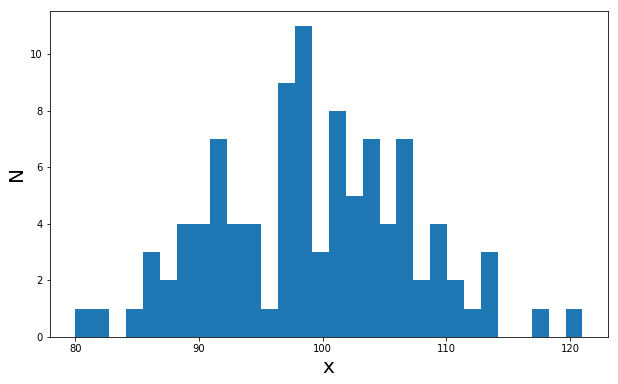

In [18]:
md['binomial'] = np.random.binomial(n,p,size=100)
plt.hist(md['binomial'], bins = 30)
plt.xlabel("x",fontsize=20)
plt.ylabel("N",fontsize=20)

Figure 7: Binomial distribution: mean=100, n=1000, p=0.1, N=100

In [19]:
print( 'Binomial distribution is %0.2f, the standard deviation: %.2f'%(md['binomial'].mean(),md['binomial'].std()))

Binomial distribution is 99.26, the standard deviation: 8.02


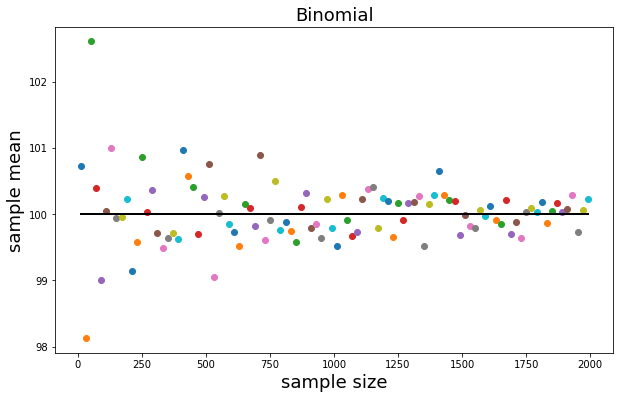

In [142]:
md['binomial'] = {}
np.random.seed(4)
for i in range(100):
    md['binomial'][i] = np.random.binomial(n,p,size=mysize[i])
    
md['binomial']['means'] = {}
axbi_mu_n = plt.figure(figsize(10,6)).add_subplot(111)

for i in range(100):
    if not type(md['binomial'][i]) == str:
        md['binomial']['means'][i] = md['binomial'][i].mean()
        #and plot it
        axbi_mu_n.plot(mysize[i],md['binomial']['means'][i], 'o')
        axbi_mu_n.set_xlabel('sample size', fontsize=18)
        axbi_mu_n.set_ylabel('sample mean', fontsize=18)
        axbi_mu_n.set_title('Binomial', fontsize=18)
        axbi_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

Figure8:  When the sample size increases, the mean of the sample is approaching to the mean of distribution, which is 100.

# 5. Exponential Distribution

In [128]:
beta = mymean

Text(0,0.5,'N')

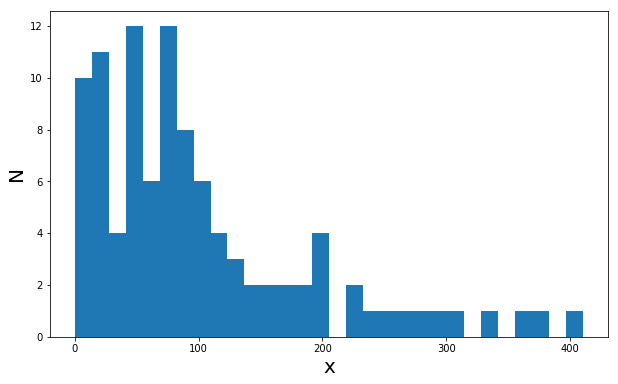

In [129]:
np.random.seed(4)
md['exponential'] = np.random.exponential(beta,size=100)
plt.hist(md['exponential'], bins = 30)
plt.xlabel("x",fontsize=20)
plt.ylabel("N",fontsize=20)

Figure 9: Exponential distribution: mean=100, beta(lamda**-1)=1000, p=0.1, N=100

In [130]:
print( 'exponential distribution mean %0.2f, the standard deviation: %.2f'%(md['exponential'].mean(),md['exponential'].std()))

exponential distribution mean 101.09, the standard deviation: 90.34


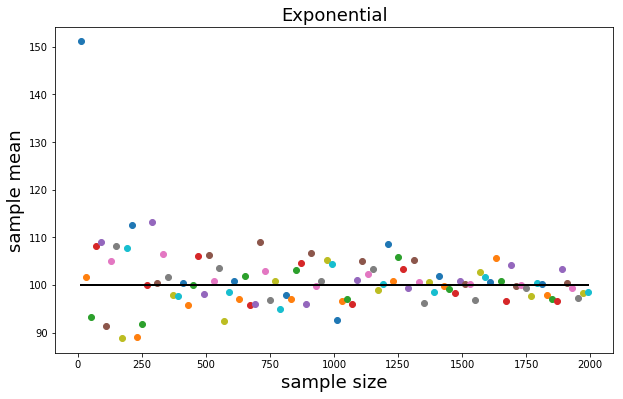

In [143]:
md['exponential'] = {}
np.random.seed(4)
for i in range(100):
    md['exponential'][i] = np.random.exponential(beta,size=mysize[i])
    
md['exponential']['means'] = {}
axexp_mu_n = plt.figure(figsize(10,6)).add_subplot(111)

for i in range(100):
    if not type(md['exponential'][i]) == str:
        md['exponential']['means'][i] = md['exponential'][i].mean()
        #and plot it
        axexp_mu_n.plot(mysize[i],md['exponential']['means'][i], 'o')
        axexp_mu_n.set_xlabel('sample size', fontsize=18)
        axexp_mu_n.set_ylabel('sample mean', fontsize=18)
        axexp_mu_n.set_title('Exponential', fontsize=18)
        axexp_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

Figure10:  When the sample size increases, the mean of the sample is approaching to the mean of distribution, which is 100.

# Extra Credit- Fit Gaussian to the mean

In [196]:
import pandas as pd
import scipy.stats as st
meantotal = []
for i in range(100):
    meantotal.append(md['chisq']['means'][i])
    meantotal.append(md['binomial']['means'][i])
    meantotal.append(md['poisson']['means'][i])
    meantotal.append(md['normal']['means'][i])
    meantotal.append(md['exponential']['means'][i])
meantotal

[94.46538872934993,
 100.72727272727273,
 95.68964532007199,
 99.47617769350563,
 151.09402334566707,
 102.09614848183865,
 98.12903225806451,
 101.23440274920043,
 99.93102792777279,
 101.73553696067427,
 100.99880784243341,
 102.6078431372549,
 101.17958252343661,
 99.95731844161939,
 93.34495251421215,
 97.74171157205096,
 100.3943661971831,
 103.25302170752151,
 100.0232147258223,
 108.11686623594603,
 101.13650760275307,
 99.0,
 100.77999575593105,
 100.0159217555153,
 108.99085040449054,
 100.24949210039152,
 100.05405405405405,
 100.50975842376933,
 99.98267017752316,
 91.35592172444912,
 102.23696765656439,
 100.99236641221374,
 100.25640594820494,
 99.98946787419796,
 105.01161628564145,
 100.04297356131161,
 99.93377483443709,
 99.3542853090463,
 99.87026422164129,
 108.09617388398858,
 100.42932074080004,
 99.95906432748538,
 98.84648320531804,
 99.92214956242701,
 88.85882395057754,
 97.23240967616346,
 100.22513089005236,
 99.56462470991156,
 99.9736933519048,
 107.7496745

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(20, 180)

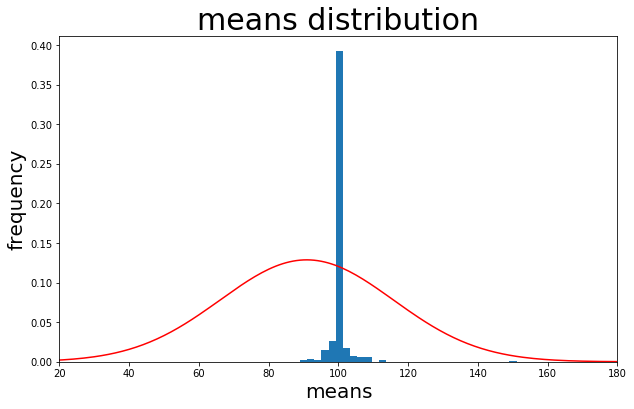

In [207]:
plt.figure(figsize(10,6)).add_subplot(111)
plt.hist(meantotal,bins = 30,normed=True)
#plot y from counts to frequency use normed, which means density
plt.xlabel('means', fontsize = 20)
plt.ylabel('frequency',fontsize=20)
plt.title('means distribution',fontsize=30)

m,s = st.norm.fit(meantotal)
linsp = np.linspace(min(meantotal),max(meantotal),len(meantotal))
pdf_g = st.norm.pdf(linsp,m,s)
plt.plot(pdf_g,"r")
plt.xlim(20,180)

Figure11:The distribution of mean  fits with Gaussian Distribution.

In [9]:
###After graded
def create_distributions(distName, distFunc, distPars, 
                         distSizes, plotTitle):
    '''Creates 100 samples of different sizes into a dictionary
    Arguments: 
        distName: name of the distribution, string
        distFunc: the function that creates the distribution
        distPars: parameters of the distribution, tuple
        distSizes: sizes of the distributions, array
        plotTitle: title of the plot, string
    Return:
        a dictionary containing:
            the distibutions as size-distribution key-value pairs
            the mean of each distribution, 
                key:'means', value: array of means
    '''
    distrib = {}
    for n in distSizes:
        if distName == 'normal':
            distrib[n] = distPars[1]* distFunc(n) + distPars[0]
        else:     
            distrib[n] = distFunc(*distPars, size=n)
        
    distrib['means'] = {}
    ax = pl.figure(figsize=(10,6)).add_subplot(111)

    for nn in distrib:
        if not type(nn) == str:
            distrib['means'][nn] = distrib[nn].mean()
            #and plot it
            ax.plot(nn, distrib['means'][nn], 'o')
            ax.set_xlabel('sample size', fontsize=18)
            ax.set_ylabel('sample mean', fontsize=18)
            ax.set_title(plotTitle, fontsize=18)
            ax.plot([min(distSizes), max(distSizes)], [30, 30], 'k')
    return distrib

{100: array([22.94175994, 19.45035478, 19.95880926, 21.65695329, 37.67923755,
        20.48249189, 27.17373412, 27.83118301, 27.97934016, 26.38944309,
        25.6412984 , 20.8112946 , 24.70103719, 31.27814578, 19.87149398,
        22.8453008 , 36.90924546, 21.23122228, 35.41061337, 37.81117915,
        21.01055094, 30.00489418, 20.96349131, 31.49244143, 17.14159827,
        30.68118979, 49.40562445, 24.00398143, 29.3295012 , 32.872803  ,
        39.624451  , 23.46885414, 26.45265766, 20.28810834, 22.86222849,
        44.8011212 , 49.14352576, 39.16465869, 16.94569421, 22.21240457,
        33.94507568, 39.72908884, 29.11049907, 32.28439501, 37.92270096,
        41.48151352, 25.8434433 , 42.38205346, 35.33736123, 36.01260639,
        34.6835968 , 25.49996639, 32.77114476, 28.11131035, 34.57281355,
        22.87326994, 31.17711892, 29.89301748, 29.00395107, 24.65676456,
        29.65305997, 28.02281911, 21.78069488, 43.77539108, 33.97713754,
        40.67688099, 28.97048713, 31.84507186,

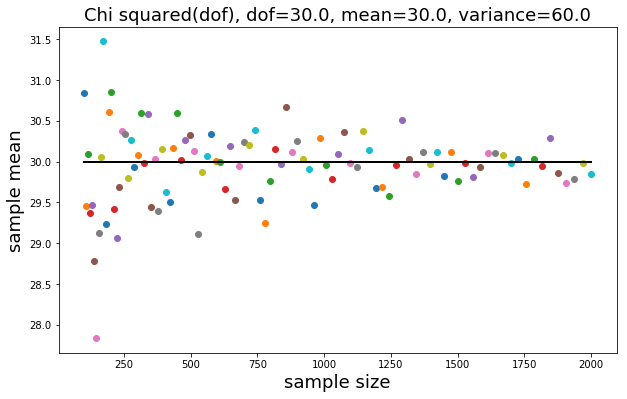

In [10]:
##After Graded

mysizes = (np.linspace(10, np.sqrt(2000), 100)**2).astype(int)

create_distributions('chisq', np.random.chisquare, (30,), 
                                   mysizes, 
                     'Chi squared(dof), dof=%.1f, mean=%.1f, variance=%.1f'\
                     %(30, 30, 2*30))